In [869]:
import os
import sys
sys.path.insert(1, '../')
import numpy as np
from data_preparation import *
from matplotlib import pyplot as plt
import random

In [870]:
data1 = load_csv(r'..\data-freeway\10105110', 8, "freeway")
data2 = load_csv(r'..\data-freeway\10105310', 8, "freeway")
data3 = load_csv(r'..\data-freeway\10105510', 8, "freeway")
data4 = load_csv(r'..\data-freeway\10108210', 8, "freeway")
data5 = load_csv(r'..\data-freeway\10106510', 8, "freeway")
data6 = load_csv(r'..\data-freeway\1095110', 8, "freeway")
data7 = load_csv(r'..\data-freeway\1095510', 8, "freeway")

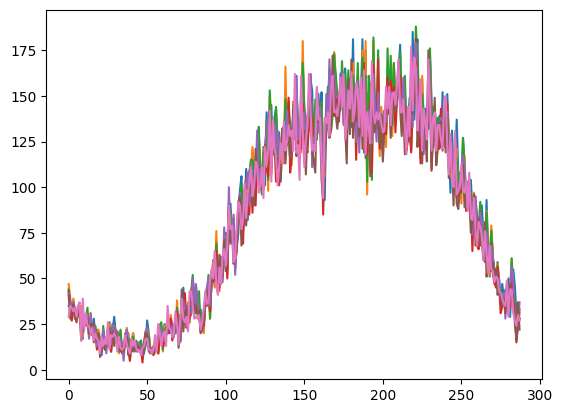

In [871]:
start = 150
start = 20
data_arr = [data1, data2, data3, data4, data5, data6, data7]

for arr in data_arr:
    plt.plot(arr[start*288:(start+1)*288])

In [872]:
class Node:
    def __init__(self):
        self.packets_to_send = 0
        self.packets_received = 0

    def add_packets_to_send(self,packets=1):
        self.packets_to_send = self.packets_to_send + packets
        return self.packets_to_send
    
    def check_send_reservoir(self):
        return self.packets_to_send

In [873]:
class Edge:
    packets_sent = 0
    node1 = None
    node2 = None

    def __init__(self, node1, node2):
        self.node1 = node1
        self.node2 = node2

In [874]:
class Network:
    nodes = []
    edges = []

    def add_node(self,new_node):
        self.nodes.append(new_node)

    def list_nodes(self):
        return self.nodes

    def add_edge(self,new_edge):
        self.edges.append(new_edge)

    def list_edges(self):
        return self.edges

    def clear_nodes(self):
        self.nodes = []

    def clear_edges(self):
        self.edges = []
        
    def add_packets(self,number_of_nodes=1,to_nodes=None):
        if to_nodes==None:
            nodes_to_add_to = [random.randint(0,len(self.nodes)-1) for _ in range(number_of_nodes)]
            for i in nodes_to_add_to:
                self.nodes[i].add_packets_to_send()
        else:
            for node in nodes_to_add_to:
                node.add_packets_to_send()

    def send_packets(self,origin_node,destination_node,along_edge,number_of_packets_to_send=1):
        
        max_packets_to_send = origin_node.check_send_reservoir()

        if max_packets_to_send >= number_of_packets_to_send:
            if along_edge.node1 == origin_node and along_edge.node2 == destination_node or along_edge.node2 == origin_node and along_edge.node1 == destination_node:
                origin_node.packets_to_send = origin_node.packets_to_send - number_of_packets_to_send
                destination_node.packets_received = destination_node.packets_received + number_of_packets_to_send
                along_edge.packets_sent = along_edge.packets_sent + number_of_packets_to_send
                return 1
            else:
                return -1
        else:
            return -2
        #print(origin_node.packets_to_send, destination_node.packets_received, along_edge.packets_sent)


    def print_node_packets(self):
        for node in self.nodes:
            print(node, node.check_send_reservoir())


In [875]:
network = Network()
network.clear_edges()
network.clear_nodes()

node_list = [Node() for x in range(0,7)]
edge_list = []

edge_list.append(Edge(node_list[0],node_list[1]))
edge_list.append(Edge(node_list[1],node_list[2]))
edge_list.append(Edge(node_list[0],node_list[2]))
edge_list.append(Edge(node_list[2],node_list[3]))
edge_list.append(Edge(node_list[2],node_list[4]))
edge_list.append(Edge(node_list[2],node_list[5]))
edge_list.append(Edge(node_list[4],node_list[6]))
edge_list.append(Edge(node_list[5],node_list[6]))

for node in node_list:
    network.add_node(node)

for edge in edge_list:
    network.add_edge(edge)

In [876]:
network.add_packets(100)
network.add_packets(100)
network.add_packets(100)
network.add_packets(100)
network.add_packets(100)
network.add_packets(100)
network.add_packets(100)
network.print_node_packets()

<__main__.Node object at 0x000001A837415888> 113
<__main__.Node object at 0x000001A837179E88> 88
<__main__.Node object at 0x000001A837179A88> 103
<__main__.Node object at 0x000001A8371791C8> 98
<__main__.Node object at 0x000001A837179948> 101
<__main__.Node object at 0x000001A837179188> 94
<__main__.Node object at 0x000001A837179AC8> 103


In [877]:
import time

N = 1000
transfers_per_pass = 5

timestr = time.strftime("%Y%m%d-%H%M%S")
os.mkdir(timestr) 

for i in range(N):
    cyclic_rate = np.round(10*np.sin(2*np.pi*i/N)) + 10
    j_list = list(range(len(edge_list)))
    random.shuffle(j_list)

    end_index = random.randint(3,len(j_list)-1)
    yes_j_list = j_list[:end_index]
    not_j_list = j_list[end_index:]

    yes_j_list = j_list
    not_j_list = []

    network.add_packets(number_of_nodes=100)
    for j in yes_j_list:
        filename = timestr + "\\" + str(id(edge_list[j])) + ".csv"
        packets_being_sent = random.randint(1,50) + cyclic_rate
        with open(filename, 'a+', newline='') as file:
            if random.randint(0,1) % 2 == 0:
                result = network.send_packets(edge_list[j].node1,edge_list[j].node2,edge_list[j],packets_being_sent)
                if result > 0:
                    file.write(str(packets_being_sent) + '\n')
                else:
                    file.write(str(0) + '\n')
            else:
                result = network.send_packets(edge_list[j].node2,edge_list[j].node1,edge_list[j],packets_being_sent)
                if result > 0:
                    file.write(str(packets_being_sent) + '\n')
                else:
                    file.write(str(0) + '\n')
    
    for j in not_j_list:
        filename = timestr + "\\" + str(id(edge_list[j])) + ".csv"
        with open(filename, 'a+', newline='') as file:
            file.write(str(0) + '\n')